<a href="https://colab.research.google.com/github/ThitipongKan/DS/blob/main/DS2_Lab1_Data_preparation_%E0%B8%A3%E0%B8%AB%E0%B8%B1%E0%B8%AA%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%995%E0%B8%AB%E0%B8%A5%E0%B8%B1%E0%B8%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# กรอกข้อมูลผู้เรียน

ชื่อ - สกุล :

ชั้น :

เลขที่ :

# **Lab 1: Data Preparation**

##🛠 ทำไมต้องเตรียมข้อมูลก่อนการใช้งาน?

การเตรียมข้อมูล (Data Preprocessing) เป็นขั้นตอนสำคัญในการทำงานกับข้อมูล เพราะข้อมูลในโลกความเป็นจริงมักมีปัญหาหลายอย่าง เช่น ข้อมูลที่ซ้ำซ้อน (duplicates), ข้อมูลที่ขาดหาย (missing values), ค่าผิดปกติ (outliers), การกระจายตัวของค่าที่ไม่สมดุล (imbalanced data), หรือค่าตัวเลขที่มีช่วงการกระจายที่แตกต่างกัน (scaling issues) การจัดการกับปัญหาเหล่านี้มีผลโดยตรงต่อความแม่นยำของโมเดลที่เราจะสร้าง

**เหตุผลที่ต้องเตรียมข้อมูลก่อนการใช้งาน**
1. ปรับปรุงคุณภาพของข้อมูล - ลดความผิดพลาดที่อาจเกิดจากข้อมูลที่ไม่สมบูรณ์หรือไม่ถูกต้อง
2. เพิ่มความแม่นยำของโมเดล - ข้อมูลที่สะอาดและสม่ำเสมอช่วยให้โมเดลเรียนรู้ได้ดีขึ้น
3. ลดอคติในข้อมูล - การทำให้ข้อมูลสมดุลจะช่วยให้โมเดลไม่ลำเอียงไปยังคลาสหรือกลุ่มข้อมูลใดกลุ่มหนึ่งมากเกินไป
4. ปรับปรุงประสิทธิภาพของการเรียนรู้ - ข้อมูลที่ผ่านการปรับขนาดและกำจัดข้อมูลที่ไม่จำเป็นออก จะช่วยลดภาระการประมวลผลและช่วยให้โมเดลสามารถวิเคราะห์ได้เร็วขึ้น
การเตรียมข้อมูลจึงเป็นพื้นฐานที่สำคัญสำหรับการวิเคราะห์ข้อมูลและการพัฒนาโมเดลที่เชื่อถือได้

# **(1) 👥 การตรวจสอบและลบข้อมูลที่ซ้ำกัน**

ข้อมูลที่ซ้ำกันอาจส่งผลกระทบต่อการวิเคราะห์หรือการสร้างโมเดล โดย**การลบข้อมูลที่ซ้ำกันจะช่วยให้โมเดลได้เรียนรู้จากข้อมูลที่หลากหลายขึ้น**

#### **ตัวอย่าง** พิจารณาตัวอย่างชุดข้อมูลจำลองที่มีชุดข้อมูลซ้ำ จากโค้ดด้านล่างนี้

In [ ]:
import pandas as pd

# สร้างตัวอย่างชุดข้อมูลที่มีข้อมูลซ้ำ
data = {
    'ID': [1, 2, 3, 4, 2, 5, 3],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Bob', 'Eva', 'Charlie'],
    'Score': [90, 85, 88, 92, 85, 95, 88]
}
df = pd.DataFrame(data)

# แสดงชุดข้อมูล
print("ชุดข้อมูลต้นฉบับ:")
print(df)

ชุดข้อมูลต้นฉบับ:
   ID     Name  Score
0   1    Alice     90
1   2      Bob     85
2   3  Charlie     88
3   4    David     92
4   2      Bob     85
5   5      Eva     95
6   3  Charlie     88


จากโค้ดและผลการรัน จะพบว่าชุดข้อมูลจำลองนี้มีข้อมูลที่ซ้ำกันอยู่ เช่น แถวที่มี ID และ Name เป็น '2' และ 'Bob' ซ้ำกัน

**คำสั่ง duplicated()** จะช่วยตรวจสอบว่ามีแถวไหนที่ซ้ำกันและแสดงแถวเหล่านั้นออกมา
ผลลัพธ์ที่ได้จากการรันโค้ดนี้จะแสดงจำนวนข้อมูลซ้ำและแถวที่ซ้ำให้เห็นชัดเจน

In [ ]:
# ตรวจสอบข้อมูลซ้ำ
df_dup = df.duplicated()
print("จำนวนข้อมูลซ้ำ:", df_dup.sum())

จำนวนข้อมูลซ้ำ: 2


In [ ]:
# แสดงข้อมูลที่ซ้ำ
print("แถวข้อมูลที่ซ้ำ:")
print(df[df_dup])

แถวข้อมูลที่ซ้ำ:
   ID     Name  Score
4   2      Bob     85
6   3  Charlie     88


เราสามารถใช้คำสั่ง **drop_duplicates()** ใน pandas เพื่อลบข้อมูลที่ซ้ำออกจาก DataFrame ได้ นี่คือตัวอย่างโค้ดที่แสดงการลบข้อมูลซ้ำ:

In [ ]:
# ลบข้อมูลซ้ำออก
df2 = df.drop_duplicates()
df2

,ID,Name,Score
0,1,Alice,90
1,2,Bob,85
2,3,Charlie,88
3,4,David,92
5,5,Eva,95


In [ ]:
# ตรวจสอบผลลัพธ์ว่ามีข้อมูลซ้ำเหลืออยู่หรือไม่
dup_remaining = df2.duplicated().sum()
print("จำนวนข้อมูลซ้ำที่เหลืออยู่หลังการลบ:", dup_remaining)

จำนวนข้อมูลซ้ำที่เหลืออยู่หลังการลบ: 0


## **แบบฝึกหัดที่ 1** 💪
จากชุดข้อมูล diamonds ที่กำหนดให้ จงดำเนินการต่อไปนี้
- ตรวจสอบข้อมูลซ้ำ แสดงจำนวนข้อมูลที่ซ้ำ แสดงแถวที่ซ้ำ
- ลบข้อมูลที่ซ้ำออก
- แสดงชุดข้อมูลที่ตัดข้อมูลซ้ำออกแล้ว พร้อมทั้งระบุจำนวนแถวที่เหลืออยู่

In [ ]:
import seaborn as sns
import pandas as pd

# โหลด dataset diamonds
diamonds = sns.load_dataset('diamonds')

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
# เขียนโค้ดที่นี่ (สามารถเพิ่ม code cells ได้)


# **(2) 🔮 Missing Data**
การมีค่าขาดหายทำให้ผลการวิเคราะห์ผิดเพี้ยน สามารถจัดการได้หลายวิธี เช่น การแทนที่ด้วยค่าเฉลี่ย การเติมค่าด้วยวิธีเฉพาะ หรือการลบแถวที่มีค่าขาดหายไป

**เหตุผลที่ข้อมูลหายไป**

🧑🏻‍💻 Programming error

😕 ความผิดพลาดของเครื่องมือในการวัด

❌ ความผิดพลาดในการกรอกข้อมูล

etc...

**ตัวอย่าง**

NaN (not a number)

999
?

±

∞(infinite values)

"" (Empty string)

### **2.1) วิธีการลบหรือแทนที่ข้อมูลที่ขาดหายไป**
การตัดสินใจว่าจะลบข้อมูลที่ขาดหายไป (drop) หรือแทนที่ด้วยค่ากลาง (impute) ขึ้นอยู่กับลักษณะของข้อมูลและวัตถุประสงค์ของการวิเคราะห์ ข้างล่างนี้เป็นหลักการสำหรับการเลือกใช้วิธีการแต่ละแบบ:

**1. การลบข้อมูลที่ขาดหาย (Dropping Missing Data)**
การลบข้อมูลที่ขาดหายไปมักเหมาะสมในกรณีต่อไปนี้
- **ข้อมูลที่ขาดหายไม่มาก:** ถ้าข้อมูลที่ขาดหายไปมีสัดส่วนเพียงเล็กน้อย (เช่น <5%) การลบข้อมูลนั้นออกอาจไม่กระทบต่อผลลัพธ์โดยรวมมากนัก
- **ไม่มีข้อมูลที่สำคัญในแถว:** ถ้าข้อมูลที่ขาดหายไปอยู่ในแถวที่ขาดค่าที่สำคัญหลายค่า การลบแถวนั้นอาจเหมาะสมกว่า
- **ข้อมูลมีการบันทึกซ้ำมากพอ:** ถ้าข้อมูลมีจำนวนบันทึกหรือจำนวนแถวเพียงพอ การลบแถวบางแถวที่มีข้อมูลขาดหายจะไม่กระทบต่อการวิเคราะห์มากนัก

**2. การแทนที่ด้วยค่ากลาง (Imputing with Mean, Median, or Mode)**
การแทนที่ค่าขาดหายด้วยค่ากลางเหมาะสมในกรณีต่อไปนี้
- **ข้อมูลมีความสำคัญและไม่ควรลบออก:** ถ้าแถวที่มีค่าขาดหายมีข้อมูลที่สำคัญต่อการวิเคราะห์ การแทนที่ด้วยค่ากลางจะช่วยรักษาข้อมูลที่เหลืออยู่
- **ค่าที่ขาดหายมีจำนวนมากเกินกว่าที่จะลบออกได้:** ถ้าค่าที่ขาดหายมีจำนวนมาก การลบข้อมูลอาจทำให้เสียข้อมูลสำคัญ การแทนที่ด้วยค่ากลางอาจเป็นทางเลือกที่ดีกว่า
- **คอลัมน์ข้อมูลเป็นตัวเลข:** หากคอลัมน์เป็นข้อมูลเชิงตัวเลข เราอาจแทนที่ด้วยค่าเฉลี่ย (mean) หรือค่ามัธยฐาน (median)
  - **ค่าเฉลี่ย (mean)** เหมาะกับข้อมูลที่มีการกระจายใกล้เคียงกัน (ไม่มี outliers)
  - **ค่ามัธยฐาน (median)** เหมาะกับข้อมูลที่มีการกระจายแบบไม่สมมาตรหรือมี outliers
- **คอลัมน์ข้อมูลเป็นเชิงหมวดหมู่ (categorical):** แทนที่ค่าขาดหายด้วยค่าที่พบมากที่สุด (mode) เพื่อรักษาความถี่และความสำคัญของข้อมูล


### **2.2) คำสั่ง fillna()**
เป็นคำสั่งที่ใช้ในการแทนที่หรือเติมข้อมูลที่ขาดหายใน DataFrame ซึ่งมีรายละเอียดและการใช้งานดังนี้

```
ชื่อDataFrame.fillna(value, inplace=False)
```

ใช้สำหรับแทนที่หรือเติมข้อมูลที่เป็นค่าว่าง (NaN) ใน DataFrame หรือ Series ด้วยค่าที่กำหนด

- **value** คือ ค่าที่ต้องการใช้แทนที่ข้อมูลที่หายไป สามารถเป็นค่าคงที่ (เช่น ตัวเลข, ข้อความ) หรือค่าที่คำนวณได้ (เช่น ค่ามัธยฐาน หรือค่าเฉลี่ย)
- **inplace** หาก inplace=True จะทำการแทนค่าลงใน DataFrame เดิมโดยไม่ต้องสร้าง DataFrame ใหม่ (ค่าเริ่มต้นคือ False ซึ่งจะคืนค่า DataFrame ใหม่)

ตัวอย่างการใช้งาน ดังนี้

#### **ตัวอย่าง** พิจารณาตัวอย่างชุดข้อมูลด้านล่างนี้

In [ ]:
import seaborn as sns
import pandas as pd

# โหลด dataset titanic
titanic = sns.load_dataset('titanic')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# เลือกคอลัมน์ที่ต้องการ
selected_columns = titanic[['age', 'deck','embarked', 'embark_town']]
# แสดงจำนวนข้อมูลที่ขาดหายไป
print(selected_columns.isnull().sum()/len(titanic)*100)

age            19.865320
deck           77.216611
embarked        0.224467
embark_town     0.224467
dtype: float64


**พิจารณา คอลัมน์ age**
- มีข้อมูลขาดหายบางส่วน แต่ไม่ได้มีสัดส่วนที่สูงมากจนควรลบทิ้ง
- ข้อมูลอายุอาจมีความสำคัญต่อการวิเคราะห์และสร้างโมเดล เช่น การวิเคราะห์โอกาสรอดชีวิตตามช่วงอายุ
- ควรใช้ค่ามัธยฐาน (median) เพื่อแทนที่ เนื่องจาก age อาจมีการกระจายที่ไม่สมมาตร (โดยเฉพาะในกลุ่มเด็กและผู้สูงอายุ)

In [ ]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/tmp/ipython-input-3658659769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


คำอธิบายโค้ดเพิ่มเติม:
- ทำการเติมข้อมูลที่ขาดหายไป (NaN) ในคอลัมน์ age ของ DataFrame titanic ด้วยค่ามัธยฐาน (median) ของคอลัมน์ age และทำการแทนที่ข้อมูลใน DataFrame เดิมทันที (inplace=True)

In [ ]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-88629372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/tmp/ipython-input-88629372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

## **แบบฝึกหัดที่ 2** 💪
1. หากไม่ต้องการ drop missing data ของคอลัมน์ embark_town ควรแทนที่ข้อมูลที่หายไปด้วยค่ากลางค่าใด พร้อมแทนที่ข้อมูลด้วยค่ากลางนั้น
2. ควรจัดการคอลัมน์ deck อย่างไร และใช้คำสั่งเพื่อดำเนินการให้เรียบร้อย

In [ ]:
# ข้อ 2.1
# code here

In [ ]:
# ข้อ 2.2
# code here

#**(3) แปลงข้อมูลเชิงข้อความเป็นตัวเลข (Encoding)**

Encoding data (การเข้ารหัสข้อมูล) หมายถึงกระบวนการ แปลงข้อมูลจากรูปแบบที่มนุษย์เข้าใจ (เช่น ข้อความ หมวดหมู่) ให้กลายเป็นรูปแบบที่คอมพิวเตอร์เข้าใจได้ (เช่น ตัวเลขหรือรหัสไบนารี) เพื่อให้สามารถนำข้อมูลนั้นไปใช้ในการประมวลผล เช่น การสร้างโมเดล Machine Learning หรือการคำนวณทางสถิติ

การทำเป็น dummy ในงานด้านข้อมูล หมายถึง
👉 การ แปลงค่าหมวดหมู่ (categorical variables) ให้กลายเป็น ตัวเลข 0 หรือ 1 — ซึ่งก็คือ แต่ละหมวดหมู่จะถูกแทนด้วยคอลัมน์ใหม่ ที่มีค่า

*   1 → ถ้าแถวนี้เป็นหมวดหมู่นั้น
*   0 → ถ้าไม่ใช่

หมายเหตุ drop_first=True → ตัดคอลัมน์หนึ่งออก เพื่อหลีกเลี่ยงปัญหา multicollinearity (ในกรณีใช้กับ regression)





แปลงคอลัมน์เชิงหมวดหมู่ เช่น sex, class, embark_town เป็น dummy variables:

การทำเป็น dummy ใช้สำหรับข้อมูล Nominal (ไม่มีลำดับเปรียบเทียบค่าไม่ได้) เช่น 'Red', 'Green', 'Blue' เพื่อป้องกันไม่ให้โมเดลเข้าใจผิดว่า 'Blue' (2) มีค่ามากกว่า 'Red' (0)

ในกรณี Encode ข้อมูล Ordinal (มีลำดับเปรียบเทียบค่าได้) เช่น 'Small', 'Medium', 'Large' (แปลงเป็น 0, 1, 2) หรือใช้กับตัวแปรเป้าหมาย (y) ให้ใช้ Label Encoding

In [ ]:
titanic = pd.get_dummies(titanic, columns=['sex','class', 'embarked'], drop_first=True, dtype=int)
titanic

,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone,sex_male,class_Second,class_Third,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,True,NaN,Southampton,no,True,1,1,0,0,1
887,1,1,19.0,0,0,30.0000,woman,False,B,Southampton,yes,True,0,0,0,0,1
888,0,3,28.0,1,2,23.4500,woman,False,NaN,Southampton,no,False,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,man,True,C,Cherbourg,yes,True,1,0,0,0,0


## **แบบฝึกหัดที่ 3** 💪

โหลดข้อมูล tips ใน seaborn แล้วแปลงข้อมูลเพศเป็นตัวเลข 0,1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# โหลด dataset tips
tips = sns.load_dataset('tips')
tips.info()
# code here


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# **(4) 🐳 Outliers**
ค่าผิดปกติอาจเป็นสัญญาณของข้อมูลที่ไม่ถูกต้อง การกำจัดหรือเปลี่ยนแปลงค่าผิดปกติสามารถช่วยปรับปรุงความแม่นยำของโมเดลได้

**เหตุผลที่มี outliers**

⌨️ ข้อมูลมีข้อผิดพลาด

📐 การวัดผิดพลาด

🧑🏻‍🔬 การคำนวณผิดพลาด

**Outliers affect:**

🕵🏻‍♀️ การกระจายตัวของข้อมูล

🕵🏻‍♀️ การใช้ค่ากลาง

🤖 ประสิทธิภาพของโมเดลการเรียนรู้ของเครื่อง

###**4.1) Detecting Outliers - Boxplot**
เราใช้ boxplots ในการแสดงค่า outliers ของชุดข้อมูล

In [ ]:
# โหลด dataset tips
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


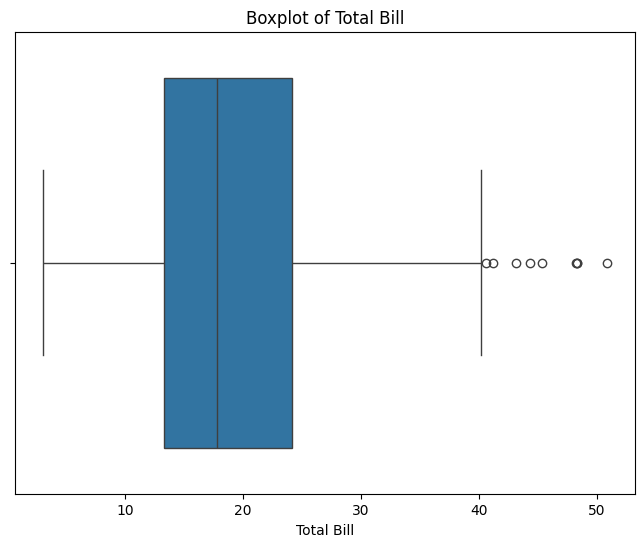

In [ ]:
# สร้าง Boxplot เพื่อตรวจสอบ outliers ในคอลัมน์ total_bill
plt.figure(figsize=(8, 6))
sns.boxplot(data=tips, x='total_bill')
plt.title("Boxplot of Total Bill")
plt.xlabel("Total Bill")
plt.show()

#### **4.2) การตรวจจับ Outlier ด้วยกฎ 1.5 เท่าของ IQR**

![Alternative Text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*0MPDTLn8KoLApoFvI0P2vQ.png)

**IQR (Interquartile Range)** เป็นค่าที่ใช้วัดการกระจายของข้อมูลระหว่างควอไทล์ที่ 1 (Q1) และควอไทล์ที่ 3 (Q3) ซึ่งครอบคลุมข้อมูลกลาง 50% ของชุดข้อมูล IQR มีประโยชน์ในการระบุขอบเขตที่ใช้ในการตรวจจับ outliers ซึ่งสามารถคำนวณได้ โดยใช้คำสั่งดังนี้

```
IQR = Q3 - Q1
```

**กฎ 1.5 เท่าของ IQR** ใช้ในการกำหนดขอบเขตเพื่อระบุค่า outliers:
- **ขอบเขตล่าง**: Q1 - 1.5 × IQR
- **ขอบเขตบน**: Q3 + 1.5 × IQR

ค่าข้อมูลที่อยู่นอกช่วงระหว่างขอบเขตล่างและขอบเขตบนนี้จะถือว่าเป็น **outliers** ซึ่งควรพิจารณาในการวิเคราะห์หรือทำความสะอาดข้อมูลต่อไป.

🎦**คลิปวิดีโอ Determining an Outlier Using the 1.5 IQR Rule:**
https://youtu.be/rZJbj2I-_Ek?si=oJ7N2NlGJU5FekDb

In [ ]:
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1

# กำหนดช่วงสำหรับการตัด outliers (มากกว่า 1.5 เท่าของ IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# แยกข้อมูลที่ไม่เป็น outliers ไว้ในดาต้าเฟรมชื่อ tips_no_outliers
tips_no_outliers = tips[(tips['total_bill'] >= lower_bound) & (tips['total_bill'] <= upper_bound)]

# แสดงจำนวนข้อมูลที่ตัดออก
outliers = tips[(tips['total_bill'] < lower_bound) | (tips['total_bill'] > upper_bound)]
print("จำนวน Outliers ที่พบ:", len(outliers))
print("ข้อมูล Outliers ที่ถูกตัดออก:")
print(outliers[['total_bill']])


tips_no_outliers[['total_bill']].head()

จำนวน Outliers ที่พบ: 9
ข้อมูล Outliers ที่ถูกตัดออก:
     total_bill
59        48.27
102       44.30
142       41.19
156       48.17
170       50.81
182       45.35
184       40.55
197       43.11
212       48.33


,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


## **แบบฝึกหัดที่ 4** 💪

จงใช้ boxplot ตรวจสอบ outlier ของคอลัมน์ชื่อ tip พร้อมทั้งตัด outlier ทิ้ง

In [ ]:
# code here


# **(5) 🔢 Feature Scaling**

การปรับขนาด (Scaling) จะช่วยลดผลกระทบของการกระจายข้อมูลที่ต่างกัน การปรับขนาดอาจใช้วิธีเช่น Standardization หรือ Normalization ขึ้นอยู่กับประเภทของโมเดล

**ทำไมต้องทำการ Scaling?**

ลองนึกภาพว่าเรามีข้อมูล 2 คอลัมน์: 'อายุ' (เช่น 20-60) และ 'เงินเดือน' (เช่น 15,000-150,000) หากเรานำข้อมูลนี้ไปใช้เลย โมเดลอาจจะให้ความสำคัญกับ 'เงินเดือน' มากกว่า 'อายุ' เพียงเพราะตัวเลขมันสูงกว่า การ Scaling จะช่วยปรับให้ทุกคอลัมน์มี "สเกล" ที่ใกล้เคียงกัน เพื่อให้โมเดลพิจารณาความสำคัญของข้อมูลได้อย่างยุติธรรม

❗️ฟีเจอร์ที่มีขนาดใหญ่อาจส่งผลกระทบเกินจริงและบดบังฟีเจอร์ที่มีขนาดเล็กกว่าได้

⚡️ การปรับสเกลให้มีขนาดเล็กลงช่วยเพิ่มประสิทธิภาพการประมวลผล

🕵🏻‍♂️ เพิ่มความสามารถในการตีความถึงผลกระทบของแต่ละฟีเจอร์ในโมเดล Machine Learning

**The most famous scalers**
1. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) ("Standardizing")

2. [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) ("Normalizing")


การปรับขนาดข้อมูลช่วยให้โมเดลทำงานได้อย่างมีประสิทธิภาพมากขึ้น เนื่องจากลดผลกระทบของขนาดและการกระจายข้อมูลที่แตกต่างกัน

**อ่านเพิ่มเติม:** https://www.nerd-data.com/normalization_standardization/

#### **ตัวอย่าง** พิจารณาตัวอย่างชุดข้อมูลจำลอง และการทำ Scaling ดังต่อไปนี้

In [ ]:
import pandas as pd

# ตัวอย่างข้อมูล
data = {'Feature1': [10, 20, 30, 40, 50], 'Feature2': [100, 150, 200, 250, 300]}
df = pd.DataFrame(data)
df

,Feature1,Feature2
0,10,100
1,20,150
2,30,200
3,40,250
4,50,300


- **ตัวอย่างการทำ Standardization**
  - ปรับข้อมูลให้อยู่ในรูปแบบที่มีค่าเฉลี่ยเป็น 0 และส่วนเบี่ยงเบนมาตรฐานเป็น 1
  - เหมาะกับโมเดลที่ต้องการข้อมูลที่มีการกระจายตัวแบบปกติ เช่น Linear Regression และ Support Vector Machines (SVM)
  - ทนทานต่อ Outliers (ค่าผิดปกติ) ได้ดีกว่า MinMaxScaler


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler

# ใช้ StandardScaler เพื่อปรับขนาดข้อมูล
scaler = StandardScaler()
std_data = scaler.fit_transform(df)

# เนื่องจากเมื่อปรับขนาดแล้วจะได้ผลลัพธ์ std_data เป็น narray ที่มีสองคอลัมน์
# ดังนั้น หลังการปรับขนาด จึงสร้างดาต้าเฟรมใหม่ชื่อ std_df โดยตั้งชื่อคอลัมน์ว่า 'Feature1' และ 'Feature2'
std_df = pd.DataFrame(std_data,columns=['Feature1', 'Feature2'])
std_df

,Feature1,Feature2
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


- **ตัวอย่างการทำ Normalization**
  - ปรับข้อมูลให้อยู่ในช่วง 0 ถึง 1
  - เหมาะกับโมเดลที่ไม่อ่อนไหวต่อการกระจายตัวของข้อมูล เช่น Neural Networks และ K-Nearest Neighbors (KNN)
  -
  อ่อนไหวต่อ Outliers มาก (ถ้ามี outlier ที่ค่าสูงหรือต่ำมากๆ จะทำให้ข้อมูลส่วนใหญ่ถูกบีบไปอยู่ในช่วงแคบๆ)

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

# ใช้ MinMaxScaler สร้างตัวปรับขนาด
scaler = MinMaxScaler()

# การใช้คำสั่งจะเหมือนกับการทำ Standardization ซึ่งเราอาจเรียกใช้คำสั่ง fit.transform() ไปพร้อมกับสร้างดาต้าเฟรมใหม่ ดังคำสั่งด้านล่างนี้
norm_df = pd.DataFrame(scaler.fit_transform(df), columns=['Feature1', 'Feature2'])
norm_df

,Feature1,Feature2
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


ในตัวอย่างที่ให้มา เราทำการ Scale ข้อมูล df ทั้งหมดในคราวเดียว ซึ่งใช้เพื่อการสาธิตเท่านั้นในกระบวนการทำ Machine Learning จริง เราห้าม (NEVER) Scale ข้อมูลทั้งหมดก่อนแบ่งข้อมูลเด็ดขาด เพราะจะทำให้เกิดปัญหา Data Leakage (การรั่วไหลของข้อมูล)

**Data Leakage คืออะไร?** คือการที่ข้อมูลจาก "ชุดทดสอบ" (Test Set) รั่วไหลเข้าไปปนเปื้อนใน "ชุดฝึกสอน" (Train Set) ครับลองนึกดูว่า: StandardScaler ต้องคำนวณค่า $\mu$ (mean) และ $\sigma$ (std) เพื่อใช้ในการแปลงค่า ถ้าเราคำนวณ $\mu$ และ $\sigma$ จากข้อมูลทั้งหมด (ทั้ง train และ test) โมเดลของเราก็ได้ "แอบเห็น" ข้อมูลในชุด test ไปแล้วนั่นเอง ซึ่งจะทำให้โมเดลดูเหมือนจะเก่งกาจในตอนทดสอบ แต่พอไปเจอข้อมูลจริงที่ไม่เคยเห็นมาก่อน (Real-world data) ก็จะทำงานได้แย่มาก

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# (สมมติว่าเรามี y ด้วย)
y = [0, 1, 0, 1, 0]

# 1. แบ่งข้อมูลก่อน!
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# 2. สร้าง Scaler
scaler = StandardScaler()

# 3. fit_transform กับ X_train
X_train_scaled = scaler.fit_transform(X_train)

# 4. transform กับ X_test (โดยใช้ scaler ตัวเดิม)
X_test_scaled = scaler.transform(X_test)

print("--- X_train (Scaled) ---")
print(pd.DataFrame(X_train_scaled, columns=df.columns))

print("\n--- X_test (Scaled) ---")
print(pd.DataFrame(X_test_scaled, columns=df.columns))

--- X_train (Scaled) ---
   Feature1  Feature2
0  1.183216  1.183216
1 -0.169031 -0.169031
2 -1.521278 -1.521278
3  0.507093  0.507093

--- X_test (Scaled) ---
   Feature1  Feature2
0 -0.845154 -0.845154


## **แบบฝึกหัดที่ 5** 💪
จากชุดข้อมูล Iris ที่กำหนดให้ ในที่นี้ได้เลือกเฉพาะคอลัมน์ตัวเลขสำหรับการทำ Standardization มาให้แล้ว ขอให้นักเรียนดำเนินการเพิ่มเติม ดังนี้
1. ใช้ StandardScaler เพื่อปรับขนาดข้อมูล และแสดงผลข้อมูลที่ปรับขนาดแล้ว
3. ใช้ MinMaxScaler เพื่อปรับขนาดข้อมูล และแสดงผลข้อมูลที่ปรับขนาดแล้ว

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# โหลดชุดข้อมูล iris จาก seaborn
iris = sns.load_dataset('iris')

# เลือกเฉพาะคอลัมน์ตัวเลขสำหรับการทำ Standardization
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = iris[features]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 5.1) ใช้ StandardScaler เพื่อปรับขนาดข้อมูล และแสดงผลข้อมูลที่ปรับขนาดแล้ว



In [ ]:
# 5.2) ใช้ MinMaxScaler เพื่อปรับขนาดข้อมูล และแสดงผลข้อมูลที่ปรับขนาดแล้ว


# ☑️ **Checkoff**
*   นักเรียนสามารถทำแบบฝึกหัด อธิบายแต่ละขั้นตอน และอธิบายได้
*   ผู้สอนอาจมีคำถามเพิ่มเติม หรือปรับเปลี่ยนเงื่อนไขของแบบฝึกหัด แล้วให้นักเรียนทดลองทำเพิ่มเติมระหว่างการ checkoff ได้
